# Pathway loading in Cytoscape

We wish to create an automated Cytoscape workflow using Python and py4cytoscape in Jupyter notebooks

In order to load our pathway from WikiPathways into Cytoscape, we have a select few prerequisites:

- Downloading and starting a new Cytoscape session
- Installing the latest versions of Wikipathways, CyTargetLinker and FileTransfer. 

This can be done via Cytoscape itself by opening Apps > App Manager > Searching for required apps.
- Downloading py4cytoscape

Next, we import the following packages:

In [1]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c

import warnings
warnings.filterwarnings('ignore')


In [56]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler
import os

log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

## Defining Pathway

Once we have imported the following packages, we can make a variable to which we assign the ID of the pathway we wish to visualise in cytoscape. 

In this case, I have assigned WP5035 from WikiPathways to the variable 'WP'

In [3]:
WP = 'WP5035'

## Loading Pathway in Cytoscape

We now will load the pathway assigned to variable 'WP' in cytoscape by running the following piece of code.

In the variable cmd_list we recall all the commands we wish to run in a systematic way. 

Since we wish to load our pathway as a network, we use the command 'import-as-network'. However, if you wish to import it as a pathway, simply replace it to 'import-as-pathway'


In [4]:
cmd_list = ['wikipathways','import-as-network','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Visualising network in Jupyter Notebook

In order to visualize the output that you get in Cytoscape in the notebook, we need to import IPython and export our network as an image.

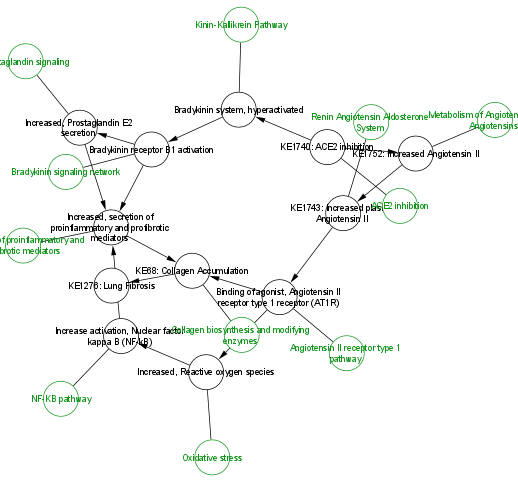

In [7]:
import IPython
p4c.export_image(filename='pathway.png')
p4c.sandbox_get_from('pathway.png')
from IPython.display import Image
Image('pathway.png')

## Network extension

Before we begin to extend our network using the linkset and CyTargetLinker, we have to identify the path where we have stored it.

In [8]:
path = 'C:/Users/Aria Jadhav/Desktop/Biomed Internship/'

linkset = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 1',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 194',
 'Added nodes: 170']

In [9]:
linkset = path + 'wikipathways-hsa-20210512-WIKIPATHWAYS.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 125',
 'Added nodes: 105']

In [10]:
linkset = path + 'wikipathways-hsa-20210512-REACTOME.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 3',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 85',
 'Added nodes: 76']

We can visualize our Cytoscape output by running the same piece of code as before and changing the file name

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


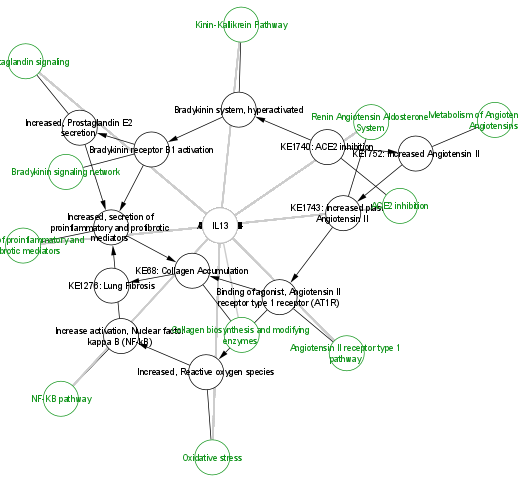

In [12]:
p4c.export_image(filename='extended_network.png')
p4c.sandbox_get_from('extended_network.png')
from IPython.display import Image
Image('extended_network.png')

## Loading and Applying Visual Style

To improve the readability of the nodes in the network, we can load a visual style file saved in the path as mentioned before.

In [15]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker_0']

 Next, we can apply this style using the following piece of code

In [16]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker_0"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens (SUID: 259)']

In [17]:
p4c.layout_network()

{}

We get the following output after applying the visual style

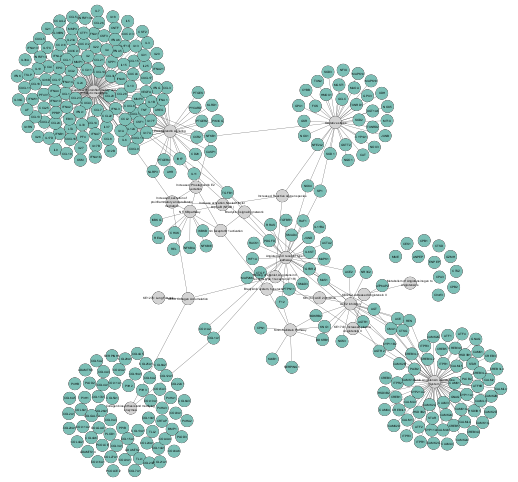

In [18]:
p4c.export_image(filename='extended_net_viz.png')
p4c.sandbox_get_from('extended_net_viz.png')
Image('extended_net_viz.png')

# Loading data expression values
We next load a file containing calculations such as: logFC, P value, FDR, etc to our network in Cytoscape by loading it as a dataframe

In [19]:
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Downloads/2021-internship-main (1)/2021-internship-main/Marvin/R-data-processing/dataExpr.csv')
dataExpr

,Name,logFC,logCPM,F,PValue,FDR
0,SAA2,2.414265,5.432500,5.120911e+02,1.410000e-12,1.880000e-08
1,CCL20,3.133684,4.949061,4.479182e+02,3.560000e-12,2.380000e-08
2,IL36G,2.722310,4.359048,3.404549e+02,2.360000e-11,1.050000e-07
3,INHBA,1.810556,6.511435,2.727932e+02,1.070000e-10,3.580000e-07
4,TNFAIP3,1.601914,7.418585,2.634266e+02,1.360000e-10,3.630000e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000135,2.994039,6.670000e-07,9.993599e-01,9.995575e-01
13346,NCKAP5L,0.000134,4.886377,6.200000e-07,9.993826e-01,9.995575e-01
13347,FBXO24,-0.000524,-0.670124,5.710000e-07,9.994077e-01,9.995575e-01
13348,IQCD,-0.000026,0.010140,3.570000e-07,9.995316e-01,9.996065e-01


In [20]:
p4c.load_table_data(dataExpr, data_key_column="Name")

'Success: Data loaded in defaultnode table'

We then retreive a list of all the column names in the node table of Cytoscape so that we do not make errors while recalling their names while coding.

In [21]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

# Visualisation
To visualise our expression data, we first deal with our logFC values.

In [22]:
logFC_score_table = p4c.get_table_columns(table='node', columns='logFC')
logFC_score_table.head()

,logFC
512,NaN
1536,NaN
514,2.23611
1538,0.0999311
516,NaN


We then set our minimum, maximum and centre logFC values. In this case, to avoid our data being skewed, we took an upper and lower limit of +1 and -1 respectively. However, you can use the code mentioned as a comment to find the minimum, maximum and centre logFC values of your data.

Next, we used the function 'set_node_color_mapping' to allocate colours and a style to these predetermined logFC values.

In [23]:
#logFC_min = logFC_score_table.min().values[0]
#logFC_max = logFC_score_table.max().values[0]
#logFC_center = logFC_min + (logFC_max - logFC_min)/2
logFC_min = -1
logFC_max = 1
logFC_center = 0
p4c.set_visual_style('CyTargetLinker_0')

p4c.set_node_color_mapping('logFC', [logFC_min, logFC_center, logFC_max], ['#0000FF', '#FFFFFF', '#FF0000'], style_name = 'CyTargetLinker_0')

''

## P Value
Next, we visualise the P values. Here, a P value < 0.05 is considered to be significant. Since we changed the node colours to depict the logFC values, we can change the node width and colour to represent P value significance. This can be done by altering the widths in the 'set_node_border_width_mapping' function.

In [43]:
PValue_score_table = p4c.get_table_columns(table='node', columns='PValue')
PValue_min = PValue_score_table.min().values[0]
PValue_max = PValue_score_table.max().values[0]
p4c.set_node_border_width_mapping('PValue', table_column_values=[PValue_min, PValue_max], widths=[5, 5], style_name='CyTargetLinker_0')

''

p4c.set_node_shape_default('ELLIPSE', style_name='CyTargetLinker_0')
p4c.lock_node_dimensions(True, style_name='CyTargetLinker_0')
p4c.set_node_size_default(50, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#D3D3D3', style_name='CyTargetLinker_0')
p4c.set_node_border_width_default(5, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#b5b1b1', style_name='CyTargetLinker_0')
p4c.set_node_label_mapping('name', style_name='CyTargetLinker_0')
p4c.set_node_font_size_default(14, style_name='CyTargetLinker_0')

We filter for significant genes using the column filter function and show the data frame as a list so that we can visualise it on cytoscape.

In [44]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")
Sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CXCL3',
  'CSF2',
  'COL12A1',
  'MMP1',
  'CCL20',
  'ATP6AP2',
  'CALML3',
  'CALML3',
  'CALML3',
  'CES1',
  'CAMK2D',
  'CAMK2D',
  'MME',
  'CCL28',
  'TLL1',
  'CXCL1',
  'IL23A',
  'MMP9',
  'ITPR3',
  'COL8A1',
  'TLL2',
  'ITPR1',
  'ITPR1',
  'ITPR3',
  'CXCL10',
  'ATF4',
  'TNF',
  'IL36A',
  'IL1RN',
  'NFKBIA',
  'NFKBIE',
  'NFE2L2',
  'MAPK10',
  'SOD2',
  'GCLC',
  'CAT',
  'MAOA',
  'GPX3',
  'XDH',
  'MT1X',
  'GSR',
  'NFIX',
  'IRF7',
  'PTGES',
  'CXCL16',
  'IL17C',
  'TGFBR2',
  'IL1A',
  'IL1B',
  'SMAD3',
  'IL6',
  'IL36G',
  'MAP2K6',
  'NFKB1',
  'CXCL5',
  'CTGF',
  'CXCL2',
  'CXCL14',
  'IL33',
  'VEGFA',
  'LIF',
  'IL15',
  'CSF3',
  'CSF1',
  'PPIB',
  'CXCL6'],
 'edges': None}

In [45]:
df = pd.DataFrame(Sig_gene)
df.head()

,nodes,edges
0,CXCL3,None
1,CSF2,None
2,COL12A1,None
3,MMP1,None
4,CCL20,None


In [54]:
sig_gene_exp_list = df['nodes'].tolist()
#print(sig_gene_exp_list)
print(f"\nsig_gene_exp_list:\n{sig_gene_exp_list}\ntype:{type(sig_gene_exp_list)}")


sig_gene_exp_list:
['CXCL3', 'CSF2', 'COL12A1', 'MMP1', 'CCL20', 'ATP6AP2', 'CALML3', 'CALML3', 'CALML3', 'CES1', 'CAMK2D', 'CAMK2D', 'MME', 'CCL28', 'TLL1', 'CXCL1', 'IL23A', 'MMP9', 'ITPR3', 'COL8A1', 'TLL2', 'ITPR1', 'ITPR1', 'ITPR3', 'CXCL10', 'ATF4', 'TNF', 'IL36A', 'IL1RN', 'NFKBIA', 'NFKBIE', 'NFE2L2', 'MAPK10', 'SOD2', 'GCLC', 'CAT', 'MAOA', 'GPX3', 'XDH', 'MT1X', 'GSR', 'NFIX', 'IRF7', 'PTGES', 'CXCL16', 'IL17C', 'TGFBR2', 'IL1A', 'IL1B', 'SMAD3', 'IL6', 'IL36G', 'MAP2K6', 'NFKB1', 'CXCL5', 'CTGF', 'CXCL2', 'CXCL14', 'IL33', 'VEGFA', 'LIF', 'IL15', 'CSF3', 'CSF1', 'PPIB', 'CXCL6']
type:<class 'list'>


Here, we set the node border width and border colour since we only want the significant genes to have an altered border width and colour.

In [55]:
p4c.set_node_border_color_bypass(sig_gene_exp_list, '#00ff2a', network='CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens')
p4c.set_node_border_width_bypass(sig_gene_exp_list, 30, network='CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens')

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-pa

Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launc

Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launc

Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launc

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-pa

  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield

  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  Fil

  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\Aria Jadhav\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\Aria J

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-pa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
p4c.layout_network('force-directed')

{}

We can now retreive the image of our network on Cytoscape.

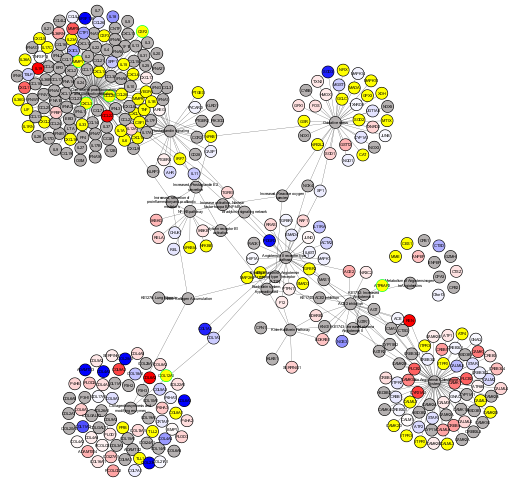

In [36]:
p4c.export_image(filename='data_net_viz.png')
p4c.sandbox_get_from('data_net_viz.png')
Image('data_net_viz.png')

# Filtering Empty Nodes
There are some genes that do not have a logFC value. In order to clear up the network to improve readability, it is better if we identify these nodes and remove them from the network. We first identify the maximum and minimum logFC values of the dataExpr table. Then, we create a column filter that filters the nodes that fall out of this range.

In [37]:
logFC_min_filter = logFC_score_table.min().values[0]
logFC_max_filter = logFC_score_table.max().values[0]

print(logFC_min_filter)
print(logFC_max_filter)

-1.6662939469999998
4.798713519


In [38]:
myFilter= p4c.create_column_filter('myFilter', 'logFC', [-1.6662939469999998,4.798713519], "IS_NOT_BETWEEN")
myFilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['COL2A1',
  'IFNA17',
  'IL1F10',
  'IFNA14',
  'COL10A1',
  'IFNA7',
  'COL26A1',
  'AGTR2',
  'IFNA10',
  'IFNB1',
  'COL25A1',
  'IL20',
  'CMA1',
  'IL7',
  'COL15A1',
  'CCL19',
  'COL14A1',
  'CCL17',
  'CYP11B2',
  'COL19A1',
  'P3H1',
  'CTSG',
  'P3H2',
  'COLGALT1',
  'CYP11A1',
  'IL2',
  'COL9A3',
  'IL17F',
  'EPO',
  'IFNA21',
  'CPB2',
  'CAMK2A',
  'IL17A',
  'CYP11A1',
  'IFNL1',
  'CCR2',
  'IFNA6',
  'PTGER2',
  'CCL25',
  'GZMH',
  'CAMK4',
  'CAMK2A',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'CCL3',
  'COL24A1',
  'EBI3',
  'IL26',
  'CREB3L3',
  'CREB3L3',
  'CD28',
  'IFNL2',
  'P3H3',
  'KLRD1',
  'COLGALT2',
  'CCL16',
  'COL6A6',
  'COL6A5',
  'CCL1',
  'COL20A1',
  'NLRP3',
  'IL24',
  'CPB1',
  'PIK3CG',
  'CPA3',
  'CCL8',
  'ENPEP',
  'CXCL13',
  'IFNA2',
  'IL4',
  'IL13',
  'LTA',
  'CCL14',
  'CCL3L3',
  'HSD3B1',
  'XCL2',
  'HSD3B2',
  'IL17B',
  'HSD3B2',
  'XCL1',
  'HSD3B1',
  'IL31',
  'CAMK1G',
  'PF4V1',
  'CAMK1G',
  'CYBB',
  'Overview

We can see in the output above that the KE nodes of our AOP have also been selected, which is not what we want. So, we create a second filter to identity just the genes in the CTL.Type column of the node table.

In [39]:
myFilter1 = p4c.create_column_filter('myFilter1', 'CTL.Type', "gene", "CONTAINS")
myFilter1

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['COL2A1',
  'IFNA17',
  'PLOD1',
  'CXCL3',
  'PLOD2',
  'IL1F10',
  'COL7A1',
  'IFNA14',
  'COL10A1',
  'IFNA7',
  'COL23A1',
  'CSF2',
  'COL26A1',
  'AGTR2',
  'IFNA10',
  'COL12A1',
  'IFNB1',
  'COL13A1',
  'MMP1',
  'COL25A1',
  'IL20',
  'COL17A1',
  'CMA1',
  'PPBP',
  'COL6A1',
  'NOS3',
  'IL7',
  'COL15A1',
  'REN',
  'CCL19',
  'COL14A1',
  'NR3C2',
  'COL16A1',
  'CCL17',
  'CYP11B2',
  'COL19A1',
  'ACE',
  'CCL20',
  'COL18A1',
  'ATP6AP2',
  'P3H1',
  'TNFSF13B',
  'CTSG',
  'P3H2',
  'AHR',
  'COLGALT1',
  'CYP11A1',
  'IL2',
  'COL4A6',
  'ATF6B',
  'CASP1',
  'COL9A3',
  'CALML3',
  'CCL22',
  'COL9A2',
  'CALML3',
  'IL17F',
  'CTSD',
  'CALML3',
  'EPO',
  'CAMK1',
  'IFNA21',
  'CPB2',
  'CAMK1',
  'CAMK2A',
  'IL17A',
  'CYP11A1',
  'CES1',
  'IFNL1',
  'CAMK2D',
  'CTSZ',
  'CCR2',
  'CAMK2D',
  'MME',
  'IFNA6',
  'CAMK2G',
  'ANPEP',
  'PTGER2',
  'CAMK2G',
  'CCL25',
  'GZMH',
  'CAMK4',
  'CREB3',
  'CCL28',
  'TLL1',
  'CAMK2A',
  'ADAMTS14',
  

In [40]:
myFilter2 = []
for item in myFilter['nodes']: 
    if item in myFilter1['nodes']:
        myFilter2.append(item)
        
print (myFilter2)

p4c.delete_selected_nodes(network='CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens')

['COL2A1', 'IFNA17', 'IL1F10', 'IFNA14', 'COL10A1', 'IFNA7', 'COL26A1', 'AGTR2', 'IFNA10', 'IFNB1', 'COL25A1', 'IL20', 'CMA1', 'IL7', 'COL15A1', 'CCL19', 'COL14A1', 'CCL17', 'CYP11B2', 'COL19A1', 'P3H1', 'CTSG', 'P3H2', 'COLGALT1', 'CYP11A1', 'IL2', 'COL9A3', 'IL17F', 'EPO', 'IFNA21', 'CPB2', 'CAMK2A', 'IL17A', 'CYP11A1', 'IFNL1', 'CCR2', 'IFNA6', 'PTGER2', 'CCL25', 'GZMH', 'CAMK4', 'CAMK2A', 'CAMK2A', 'CAMK2B', 'CAMK2B', 'CCL3', 'COL24A1', 'EBI3', 'IL26', 'CREB3L3', 'CREB3L3', 'CD28', 'IFNL2', 'P3H3', 'KLRD1', 'COLGALT2', 'CCL16', 'COL6A6', 'COL6A5', 'CCL1', 'COL20A1', 'NLRP3', 'IL24', 'CPB1', 'PIK3CG', 'CPA3', 'CCL8', 'ENPEP', 'CXCL13', 'IFNA2', 'IL4', 'IL13', 'LTA', 'CCL14', 'CCL3L3', 'HSD3B1', 'XCL2', 'HSD3B2', 'IL17B', 'HSD3B2', 'XCL1', 'HSD3B1', 'IL31', 'CAMK1G', 'PF4V1', 'CAMK1G', 'CYBB', 'NOX1', 'NOX5', 'NOX3', 'IL37', 'IFNL3', 'RACK1', 'PF4', 'CCL23', 'CCL21', 'NOX4', 'IL17D', 'MAS1', 'IL27', 'IFNA16', 'AGT', 'IFNA4', 'CCL2', 'CXCL12', 'CXCL9', 'IL25', 'AGTR1', 'CXCL8', 'IFNG'

In commands_post(): java.lang.NullPointerException


CyError: In commands_post(): java.lang.NullPointerException

Now, we can combine both these filters to only select the genes with no logFC values in the network. We can then go ahead and remove them.

In [41]:
final_filter = p4c.create_composite_filter('final_filter', ['myFilter', 'myFilter1'])
final_filter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['COL2A1',
  'IFNA17',
  'IL1F10',
  'IFNA14',
  'COL10A1',
  'IFNA7',
  'COL26A1',
  'AGTR2',
  'IFNA10',
  'IFNB1',
  'COL25A1',
  'IL20',
  'CMA1',
  'IL7',
  'COL15A1',
  'CCL19',
  'COL14A1',
  'CCL17',
  'CYP11B2',
  'COL19A1',
  'P3H1',
  'CTSG',
  'P3H2',
  'COLGALT1',
  'CYP11A1',
  'IL2',
  'COL9A3',
  'IL17F',
  'EPO',
  'IFNA21',
  'CPB2',
  'CAMK2A',
  'IL17A',
  'CYP11A1',
  'IFNL1',
  'CCR2',
  'IFNA6',
  'PTGER2',
  'CCL25',
  'GZMH',
  'CAMK4',
  'CAMK2A',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'CCL3',
  'COL24A1',
  'EBI3',
  'IL26',
  'CREB3L3',
  'CREB3L3',
  'CD28',
  'IFNL2',
  'P3H3',
  'KLRD1',
  'COLGALT2',
  'CCL16',
  'COL6A6',
  'COL6A5',
  'CCL1',
  'COL20A1',
  'NLRP3',
  'IL24',
  'CPB1',
  'PIK3CG',
  'CPA3',
  'CCL8',
  'ENPEP',
  'CXCL13',
  'IFNA2',
  'IL4',
  'IL13',
  'LTA',
  'CCL14',
  'CCL3L3',
  'HSD3B1',
  'XCL2',
  'HSD3B2',
  'IL17B',
  'HSD3B2',
  'XCL1',
  'HSD3B1',
  'IL31',
  'CAMK1G',
  'PF4V1',
  'CAMK1G',
  'CYBB',
  'NOX1',
 

In [42]:
p4c.delete_selected_nodes(network='CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens')

In commands_post(): java.lang.NullPointerException


CyError: In commands_post(): java.lang.NullPointerException